# FISCAL SPONSOR
**2024 Tidytuesday  Week 11**

## Setup

### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Fonts and Params

In [18]:
from matplotlib import rcParams
from matplotlib import font_manager

font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

rcParams['font.family'] = 'Roboto'
#rcParams['font.size'] = '12'

###  Data

In [5]:
import os
#os.getcwd()

In [7]:
dfr = pd.read_csv('fiscal_data_w11.csv')
dfr.head()

,name,created,acted,total,fee,percent,project,services,model,defintion
0,1st Note Music Foundation,2012,2012,2,We charge a 7% administrative fee for most gra...,7.00,Arts and culture,Auditing,Model C,Preapproved Grant Relationship
1,"50CAN, Inc.",2011,2016,10,Between 7.5% and 15%,11.25,Education,Auditing,Model A,Direct Project
2,"50CAN, Inc.",2011,2016,10,Between 7.5% and 15%,11.25,Education,Auditing,Model B,Independent Contractor Project
3,"50CAN, Inc.",2011,2016,10,Between 7.5% and 15%,11.25,Education,Auditing,Model C,Preapproved Grant Relationship
4,"50CAN, Inc.",2011,2016,10,Between 7.5% and 15%,11.25,Education,Bill paying,Model A,Direct Project


## Data Wrangling

In [68]:
dfr.columns

Index(['name', 'created', 'acted', 'total', 'fee', 'percent', 'project',
       'services', 'model', 'defintion'],
      dtype='object')

In [78]:
by_services = (
    dfr
    .groupby(['name', 'services',])['total'].mean().
    reset_index()
    .groupby('services')['total'].sum().sort_values()
)

In [80]:

by_services_sorted = (
    dfr
    .groupby(['name', 'services',])['total'].mean()
    .reset_index()
    .groupby('services')['total'].sum()
    .reset_index()
    .sort_values('total', ascending=False)
)
by_services_sorted.head(3)

,services,total
2,Bookkeeping,8467.0
4,Donations,7919.0
9,Org/Prog Development,7890.0


In [88]:
by_services_rev = (
    dfr
    .groupby(['name', 'services',])['total'].mean()
    .reset_index()
    .groupby('services')['total'].sum()
    .reset_index()
    .sort_values('total')
)
by_services_sorted.head(3)

,services,total
2,Bookkeeping,8467.0
4,Donations,7919.0
9,Org/Prog Development,7890.0


## Data Viz

### Pandas Plot

<Axes: title={'center': 'FISCAL SPONSORS FACTS & STATS\nNumber of projects sponsored by service type\nbetween 1903 and 2022'}>

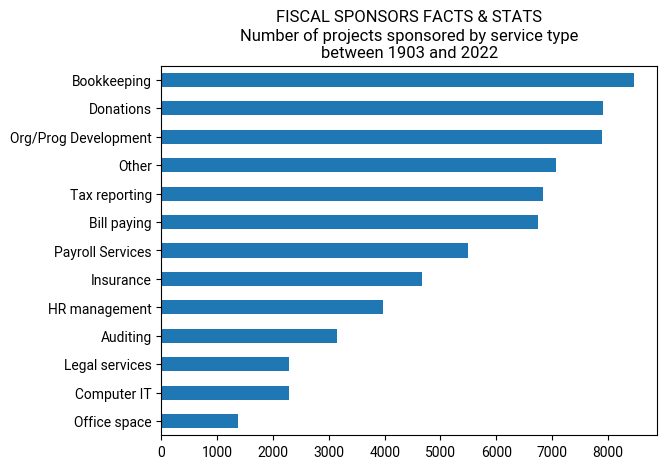

In [116]:
by_services.plot(
    kind  = 'barh', 
    title= 'FISCAL SPONSORS FACTS & STATS\nNumber of projects sponsored by service type\nbetween 1903 and 2022',
    ylabel='')

### Seaborn Plot

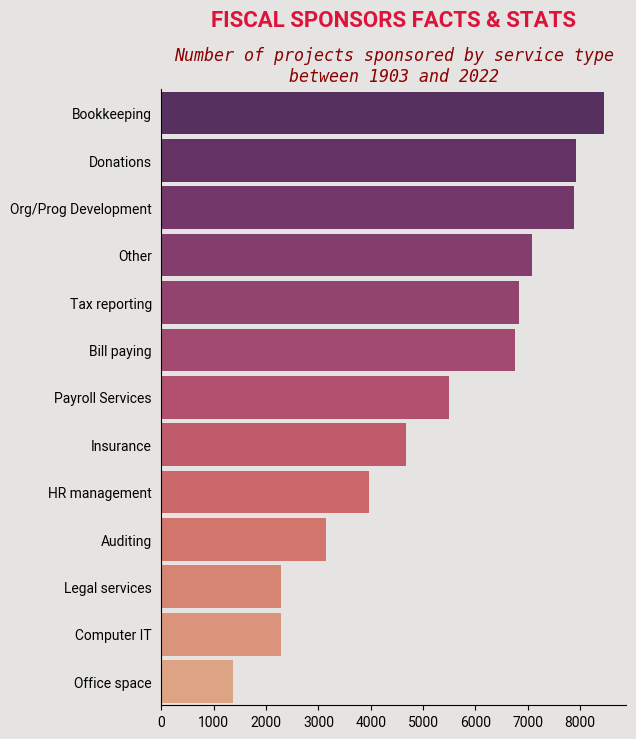

In [113]:
fig, ax = plt.subplots(1, 1, num=1, figsize=(6, 8),  facecolor="#E5E4E2")
mid = (fig.subplotpars.right + fig.subplotpars.left)/2

services = by_services_sorted["services"]
cnt = by_services_sorted["total"]

palette = sns.color_palette("flare", n_colors=len(services))
palette.reverse()

sns.barplot(x=cnt, y=services,
            hue=services,
            palette=palette,
            width=0.9,
            ax=ax)

ax.set_facecolor("#E5E4E2")


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle('FISCAL SPONSORS FACTS & STATS', size=16, x=mid, color = 'crimson', weight='bold') # or fontweight

titlefont = {'family':'monospace', 'color':'darkred', 'size':12,}
ax.set_title(
    'Number of projects sponsored by service type\nbetween 1903 and 2022',
    fontdict  = titlefont,
    style='italic')

ax.set_xlabel(""), ax.set_ylabel("")
plt.tick_params(axis='y',  which='both',  left=False,  labelbottom=True)

plt.show()

### matplotlib Plot

original code source: [Python Graph Gallery](https://python-graph-gallery.com/web-barplot-with-annotations-and-arrows/)

In [85]:
by_services_sorted.services.to_list()

['Bookkeeping',
 'Donations',
 'Org/Prog Development',
 'Other',
 'Tax reporting',
 'Bill paying',
 'Payroll Services',
 'Insurance',
 'HR management',
 'Auditing',
 'Legal services',
 'Computer IT',
 'Office space']

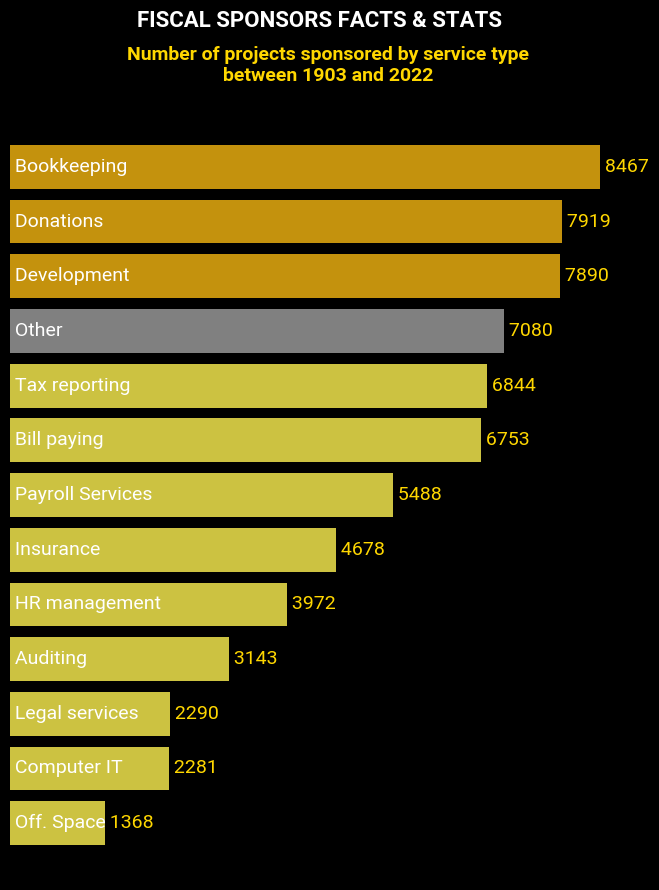

In [111]:
# initialize the figure
fig, ax = plt.subplots(figsize=(8, 10))

# remove axis
ax.axis('off')

# colors for the plot '#c4920d', 'grey', '#ccc241'
colors = {
    'Org/Prog Development': '#c4920d', 
    'Bookkeeping': '#c4920d', 
    'Donations': '#c4920d', 
    'Other': 'grey',
    'Tax reporting': '#ccc241',
    'Faith-based/religious': '#ccc241',
    'Payroll Services': '#ccc241',
    'Bill paying': '#ccc241',
    'HR management': '#ccc241',
    'Insurance': '#ccc241',
    'Auditing': '#ccc241',
    'Computer IT': '#ccc241',
    'Legal services': '#ccc241',
    'Office space': '#ccc241'
}
c = [colors[service] for service in by_services_rev['services']]
background_color = 'black'
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
text_color = 'gold'
label_color = 'white'

# create the plot
ax.barh(by_services_rev['services'], by_services_rev['total'], color=c)
for i, (value, service) in enumerate(zip(by_services_rev['total'], by_services_rev['services'])):
    if service.startswith('Faith-based'):
        service = 'Religious'
    elif service.startswith('Org/Prog'):
        service = 'Development'
    elif service.startswith('Office'):
        service = 'Off. Space'
    
    ax.text(x=1, y=i, s=f' {service}',
            ha='left', va='center', fontsize=14, color= label_color)
    ax.text(x=value, y=i, s=f' {int(value)}',
            ha='left', va='center', fontsize=14, color=text_color)


fig.suptitle('FISCAL SPONSORS FACTS & STATS', size=16, x=mid, color = 'white', weight='bold')
ax.set_title(
    'Number of projects sponsored by service type\nbetween 1903 and 2022\n',
    size=14, x=mid, color = 'gold', weight='bold')
# display the plot
plt.show()